<a href="https://colab.research.google.com/github/lyssasrodrigues/Grafo-de-Conhecimento-Arboviroses/blob/main/Projeto_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


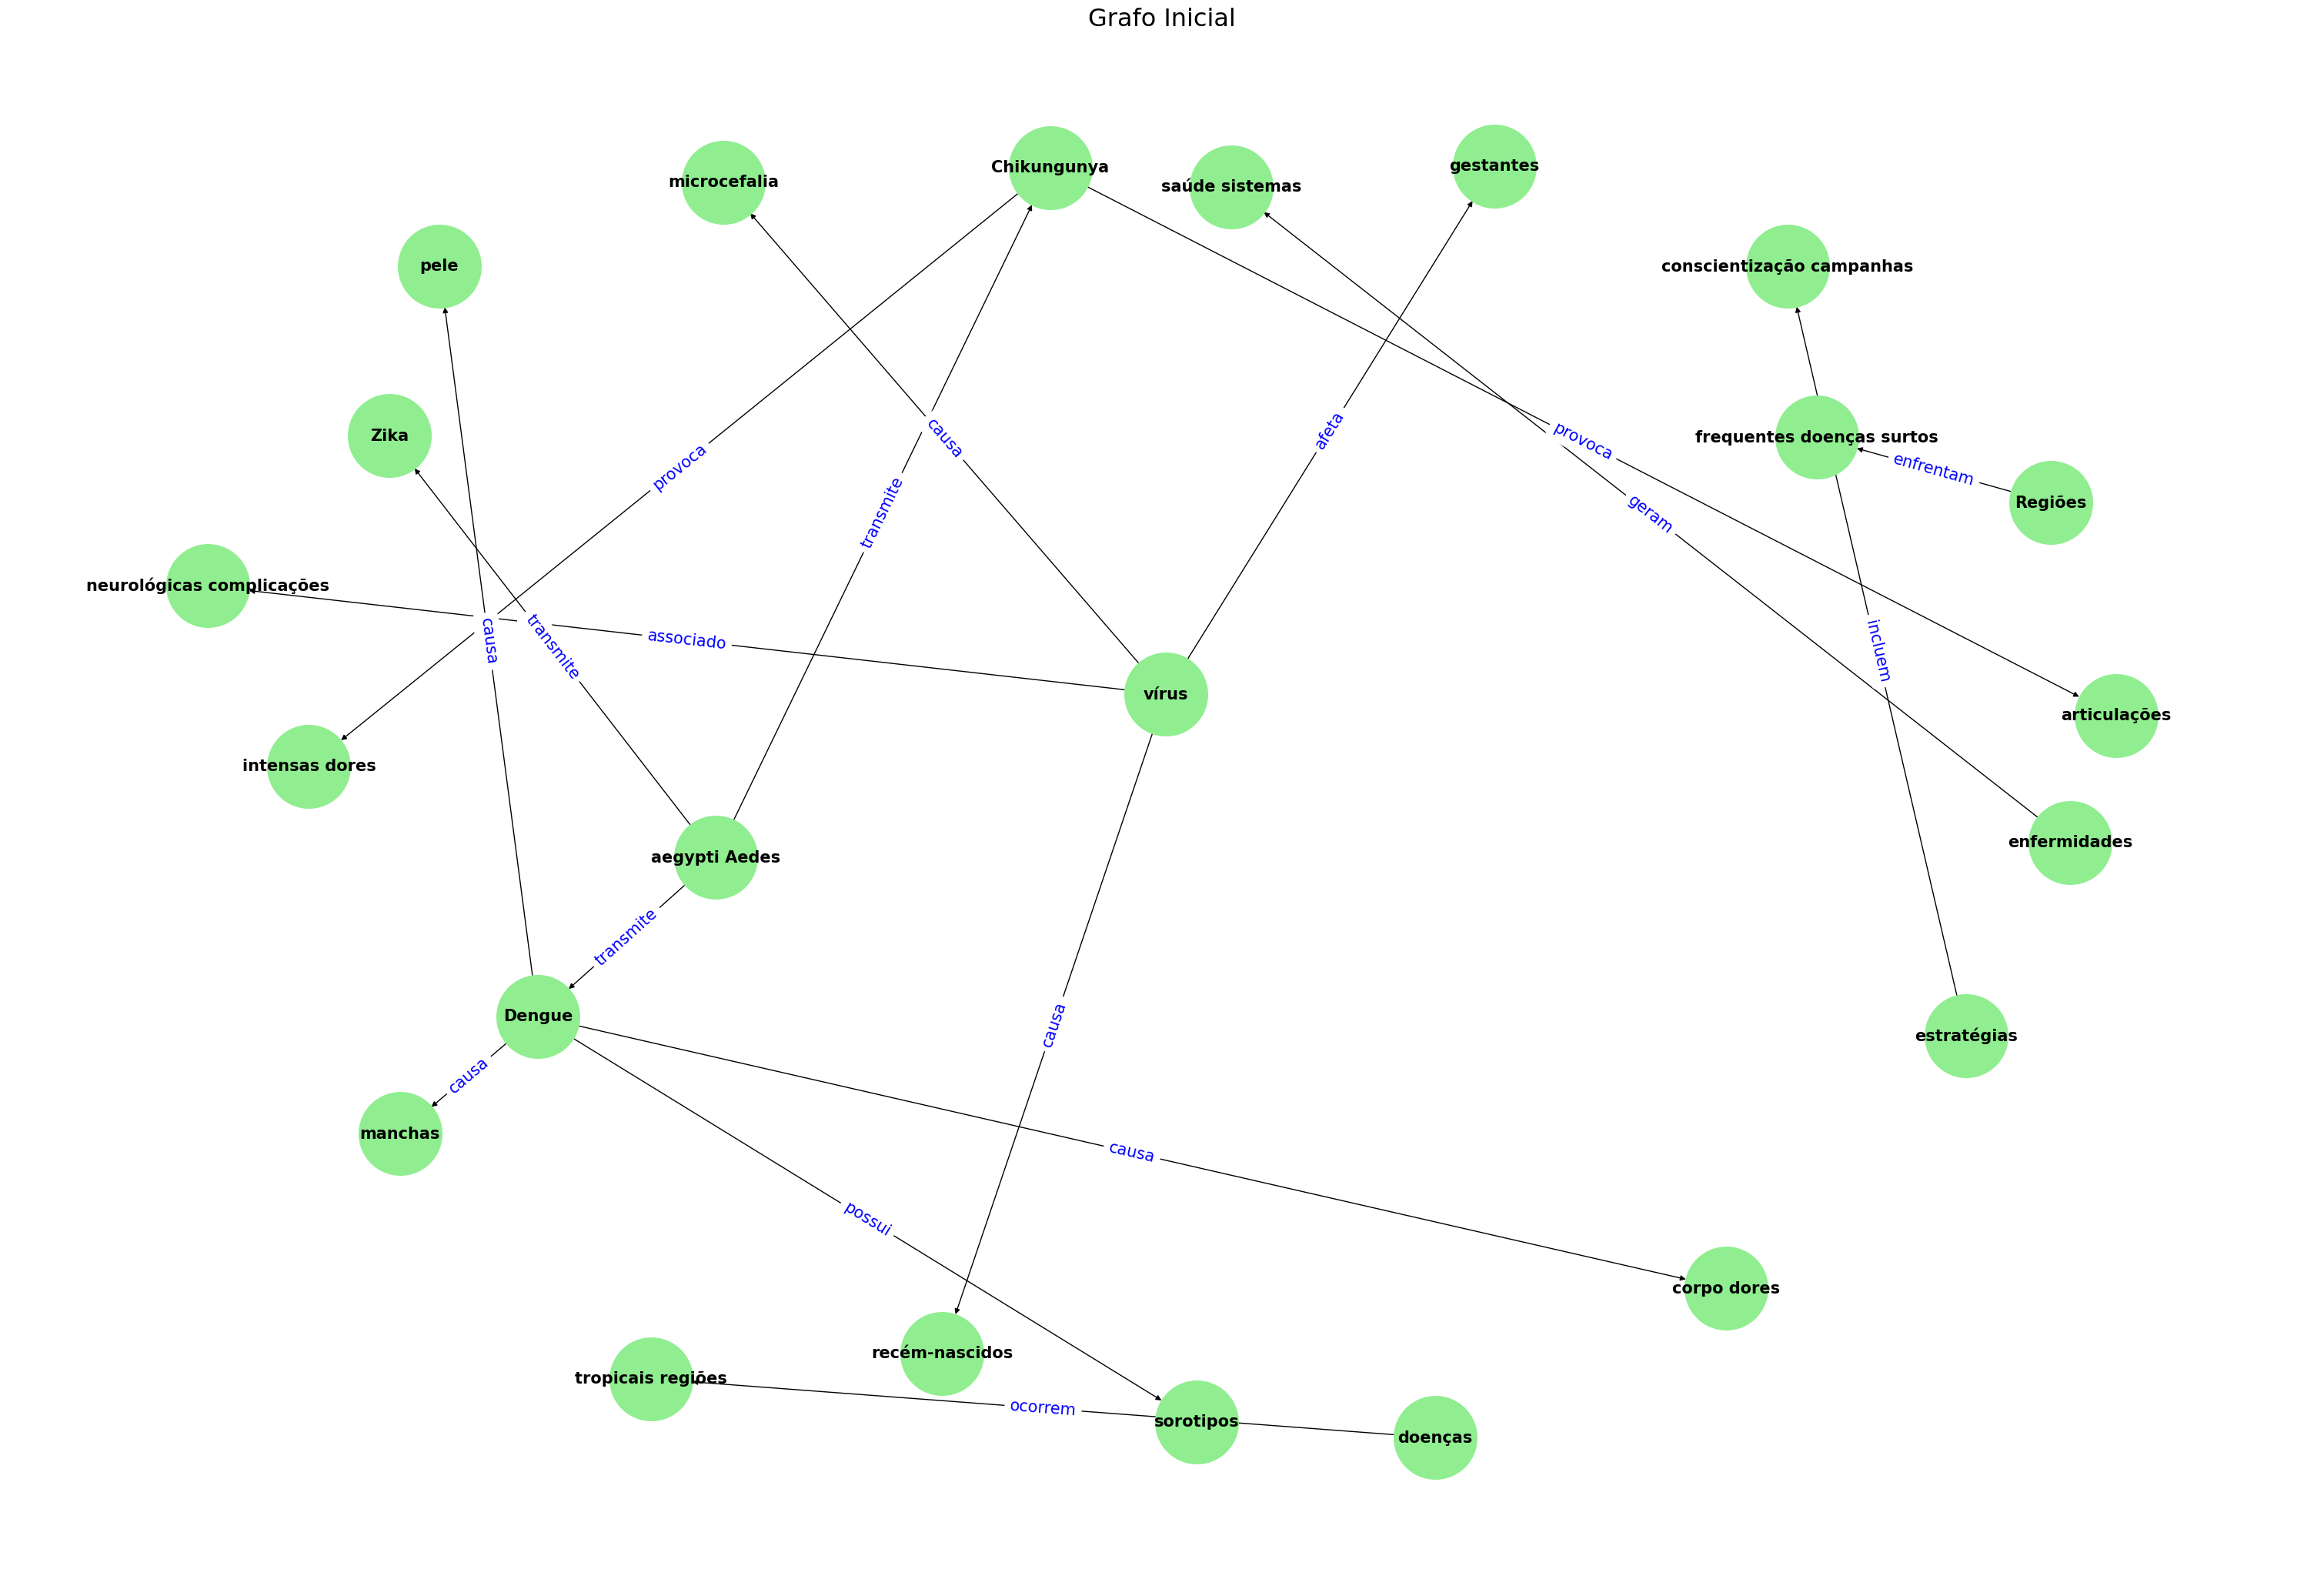

Nó 'Novo Nó' adicionado com sucesso.
Nó 'gestantes' removido.


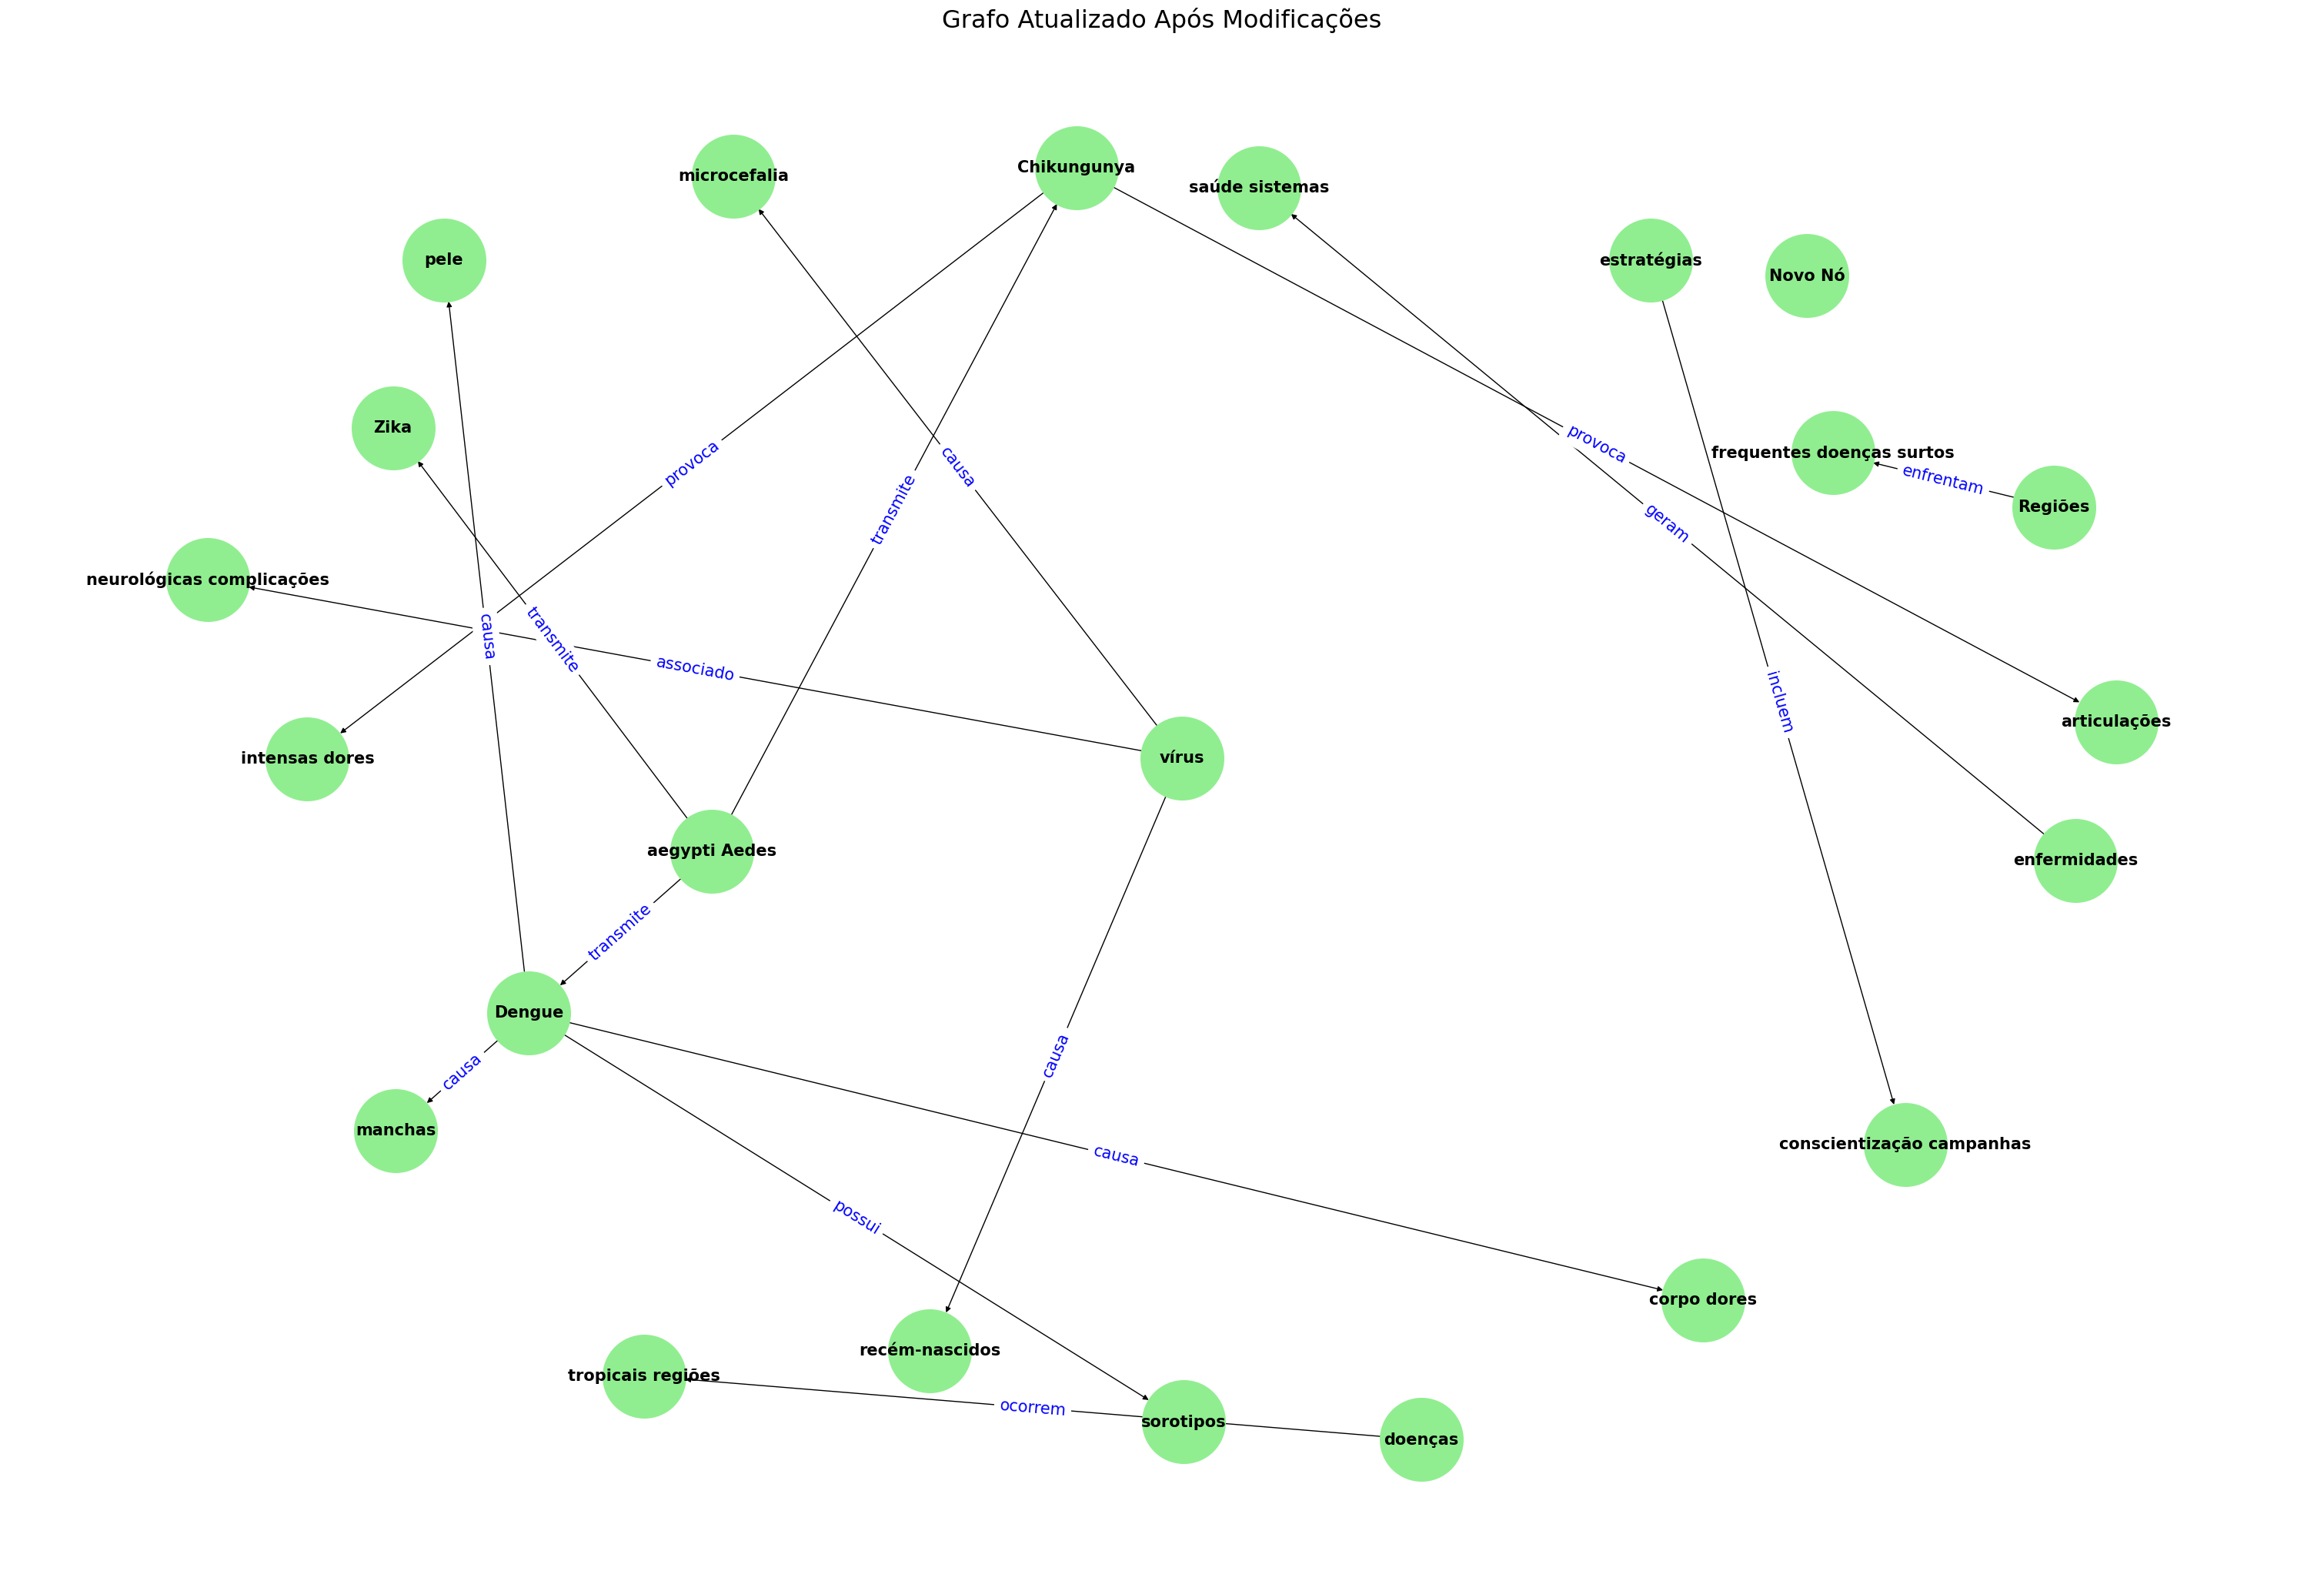

In [ ]:
# Instalar as bibliotecas necessárias
!pip install spacy networkx matplotlib

# Importar bibliotecas
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Baixar o modelo de linguagem do SpaCy
!python -m spacy download pt_core_news_sm

# Carregar o modelo de linguagem do SpaCy para português
nlp = spacy.load("pt_core_news_sm")

# Texto de entrada
text = """
O Aedes aegypti transmite a Dengue.
O Aedes aegypti também transmite a Chikungunya.
O Aedes aegypti transmite a Zika.
A Dengue causa febre alta.
A Dengue causa dores no corpo.
A Dengue causa manchas na pele.
O vírus Zika causa microcefalia em recém-nascidos.
A Chikungunya provoca dores intensas nas articulações.
As doenças Dengue, Zika e Chikungunya ocorrem principalmente em regiões tropicais.
A febre amarela é outra doença transmitida pelo mosquito Aedes aegypti.
O vírus da Zika está associado a complicações neurológicas.
Regiões tropicais enfrentam surtos frequentes dessas doenças.
Essas enfermidades geram sobrecarga nos sistemas de saúde locais.
A Dengue possui quatro sorotipos.
A Chikungunya pode deixar sequelas.
O vírus Zika também afeta gestantes.
As estratégias de controle do Aedes aegypti incluem campanhas de conscientização.
"""

# Processar o texto com SpaCy
doc = nlp(text)

# Função para extrair relações principais
def extract_main_relations(doc):
    relations = []
    for sent in doc.sents:  # Processar sentença por sentença
        root = sent.root
        subjects = []
        objects = []

        # Extrair sujeitos e seus modificadores
        for child in root.children:
            if child.dep_ in ("nsubj", "nsubj:pass") and child.pos_ in ["NOUN", "PROPN", "PRON"]:
                modifiers = " ".join([token.text for token in child.children if token.dep_ == "amod"])
                subjects.append(f"{modifiers} {child.text}".strip())

        # Extrair objetos e seus modificadores
        for child in root.children:
            if child.dep_ in ("obj", "obl", "attr", "xcomp", "ccomp") and child.pos_ in ["NOUN", "PROPN"]:
                modifiers = " ".join([token.text for token in child.children if token.dep_ in ("amod", "nmod")])
                objects.append(f"{modifiers} {child.text}".strip())

        # Adicionar relação
        for subj in subjects:
            for obj in objects:
                relations.append((subj, root.text, obj))

    return relations

# Atualizar extração com relações principais
relations = extract_main_relations(doc)

# Construção do Grafo
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for subj, rel, obj in relations:
    G.add_node(subj)
    G.add_node(obj)
    G.add_edge(subj, obj, label=rel)

# Função para visualizar o grafo
def visualizar_grafo(grafo, titulo="Grafo Atualizado", node_color="lightgreen", edge_color="black"):
    plt.figure(figsize=(30, 20))
    pos = nx.spring_layout(grafo, k=1.5, seed=50)  # Layout espaçado
    nx.draw(
        grafo,
        pos,
        with_labels=True,
        node_color=node_color,
        edge_color=edge_color,
        node_size=6000,
        font_size=15,
        font_weight="bold",
    )
    labels = nx.get_edge_attributes(grafo, "label")
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels, font_size=15, font_color="blue")
    plt.title(titulo, fontsize=23)
    plt.axis("off")
    plt.show()

# Função para adicionar nó co
def adicionar_no(grafo, no):
    if no not in grafo:
        grafo.add_node(no)
        print(f"Nó '{no}' adicionado com sucesso.")
    else:
        print(f"Nó '{no}' já existe no grafo.")

# Função para remover nó
def remover_no(grafo, no):
    if no in grafo:
        grafo.remove_node(no)
        print(f"Nó '{no}' removido.")
    else:
        print(f"Erro: Nó '{no}' não encontrado no grafo.")


# Exemplo de uso:
# 1. Visualizar grafo inicial
visualizar_grafo(G, titulo="Grafo Inicial")

# 2. Adicionar um novo nó
adicionar_no(G, "Novo Nó")


# 3. Remover um nó específico
remover_no(G, "gestantes")


# 4. Visualizar o grafo atualizado
visualizar_grafo(G, titulo="Grafo Atualizado Após Modificações")
